<a href="https://colab.research.google.com/github/enessibest/Linear-regression-project/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing required libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## next step is to upload and read the data

In [ ]:
data = pd.read_csv('/content/SeoulBikeData.csv')
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data.dtypes

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
dtype: object

In [ ]:
data.shape

(8760, 14)

In [ ]:
data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
from datetime import datetime
data['Date'] =pd.to_datetime(data.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Humidity(%)               8760 non-null   int64  
 3   Visibility (10m)          8760 non-null   int64  
 4   Temperature(C)            8760 non-null   float64
 5   Wind speed (m/s)          8760 non-null   float64
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


In [ ]:
data["Month"]=pd.DatetimeIndex(data['Date']).month
data["Year"]=pd.DatetimeIndex(data['Date']).year
data["tday"]=pd.DatetimeIndex(data['Date']).day

## What are the factors that influence the number of bikes rented?

In [ ]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Year', 'tday'],
      dtype='object')

** factors that influece the bike rented are 'Date', 'Hour', 'Temperature(C)', 'Humidity(%)',
'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)''Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons''Holiday''Functioning Day'**

## Find the missing values

In [ ]:
missing_values= data.isna().sum()
missing_values

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
Month                       0
Year                        0
tday                        0
dtype: int64

## ploting the correlation

In [ ]:
data_corr = data.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,tday
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,7.086107e-02,0.215162,4.684885e-02
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,2.684858e-18,0.000000,1.598551e-19
Temperature(C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,4.968327e-02,0.377796,8.090791e-02
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,4.779778e-02,0.035925,7.047359e-03
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-8.206909e-02,-0.003781,-6.123440e-02
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,7.788783e-02,0.052381,-1.068595e-01
Dew point temperature(C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,6.510073e-02,0.336350,6.970777e-02
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.041240e-02,0.128086,-3.445555e-03
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-2.279368e-02,0.027522,1.199827e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,5.475846e-02,-0.206418,1.014355e-01


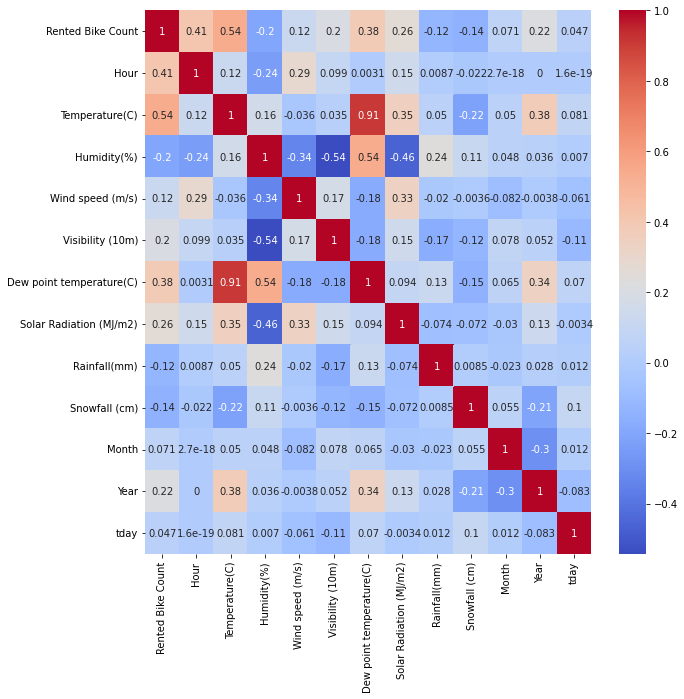

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_corr, annot=True, cmap= "coolwarm") 
plt.show() 

In [ ]:
data_cat= data.select_dtypes(include='object')


In [ ]:
data_cat.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


In [ ]:
bike_data=data
for col in data_cat:
  dummies=pd.get_dummies(data[col],drop_first=True)
  bike_data=pd.concat([bike_data,dummies],axis=1)


In [ ]:
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,tday,Spring,Summer,Winter,No Holiday,Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1


In [ ]:
final_data=bike_data.drop(["Date","Seasons","Holiday","Functioning Day"],axis=1)

In [ ]:
final_data.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,tday,Spring,Summer,Winter,No Holiday,Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,2017,12,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,2017,12,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,2017,12,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,2017,12,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,2017,12,0,0,1,1,1


,Rented Bike Count,Hour,Humidity(%),Visibility (10m),Temperature(C),Wind speed (m/s),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,37,2000,-5.2,2.2,-17.6,0.0,0.0,0.0
1,204,1,38,2000,-5.5,0.8,-17.6,0.0,0.0,0.0
2,173,2,39,2000,-6.0,1.0,-17.7,0.0,0.0,0.0
3,107,3,40,2000,-6.2,0.9,-17.6,0.0,0.0,0.0
4,78,4,36,2000,-6.0,2.3,-18.6,0.0,0.0,0.0


## Prepare data for model

In [40]:
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
##spliting the data into training and testing 
train ,test=train_test_split(final_data,test_size=0.2)

In [42]:
## x and y
X_train=train.drop(["Rented Bike Count"],axis=1)
y_train=train["Rented Bike Count"]
X_test=test.drop(["Rented Bike Count"],axis=1)
y_test=test["Rented Bike Count"]

In [43]:
## fitting into model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
y_pred=lr.predict(X_test)

In [45]:
y_pred

array([ 501.36339124, 1261.25593535,  417.04840836, ...,  677.2367084 ,
        693.91851714,  508.42467388])

In [48]:
mean_squared_error(y_pred,y_test)

184758.58512116206

In [50]:
print("Accuracy",lr.score(X_test,y_test))

0.5568759298103227